<center><h1>Vaidya_Anushka_HW2</h1></center>
<br>
<br>

Name: Anushka Vaidya
<br>
Github Username: Anushka-Vaidya
<br>
USC ID: 1450633814

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as sm

from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics, neighbors
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Get the Cycle Power Plant Data Set

In [2]:
df= pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [3]:
# rows in dataset
row = len(df)
print("Number of rows in data set are:", row)
col= len(df.columns)
print("Number of columns in data set are:", col)

Number of rows in data set are: 9568
Number of columns in data set are: 5


A. The dataset consists of data from Comnined Cycle Power Plant and it has 9568 rows and 5 columns:
1. AT(Ambient Temperature),
2. V(Vacuum), 
3. AP(Ambient Pressure), 
4. RH(Relative Humidity), 
5. PE(net hourly electrical energy output (EP) of the plant)

B. It's features are AT, V, AP, RH and the response/dependent column is PE.

#### ii. pairwise scatterplots of all the varianbles

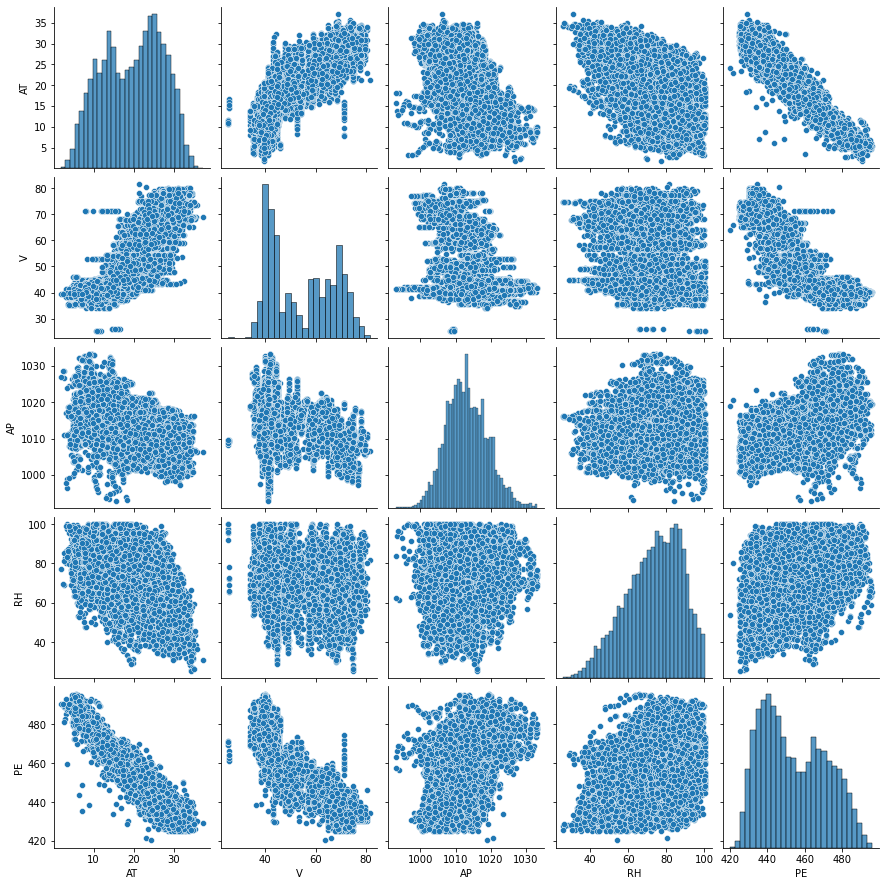

In [4]:
fig = sns.pairplot(data = df)
fig


Findings from above pairplot are:
1. AT and V are positively corelated
2. AT and PE are negatively corelated
3. V and PE are negatively corelated

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
mn= df.mean()
med= df.median()
r= df.max()- df.min()
q1= df.quantile(0.25)
q3= df.quantile(0.75)
iqr= q3-q1

#creating a table(dataframe) to display
summarize_df= pd.DataFrame({'Mean': mn,'Median': med,'Range':r,'Q1':q1, 'Q3': q3, 'IQR': iqr})
summarize_df

,Mean,Median,Range,Q1,Q3,IQR
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) Simple Linear Regression

In [6]:
#simple linear regression and it's summary

#defining independent column and dependent column
independent_columns = ['AT', 'V', 'AP', 'RH']
dependent_column='PE'
res= {}
for i in independent_columns:
    x_val= df[[i]].values
    y_val= df[dependent_column].values
    
    x_val= sm.add_constant(x_val)
    model= sm.OLS(y_val, x_val).fit()
    res[i]= model
# summarizing for each independent column
for i,model in res.items() :
    print(f"Regression summary for {i}:")
    print(model.summary())
    print("\n")


Regression summary for AT:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:36:48   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341    

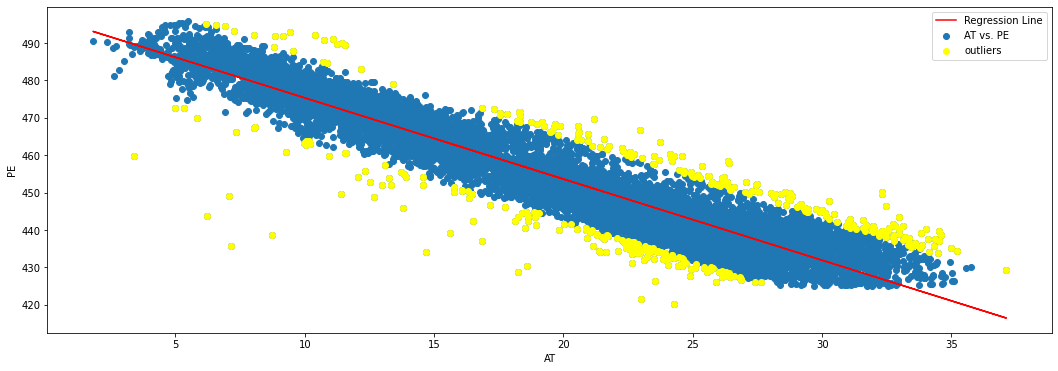

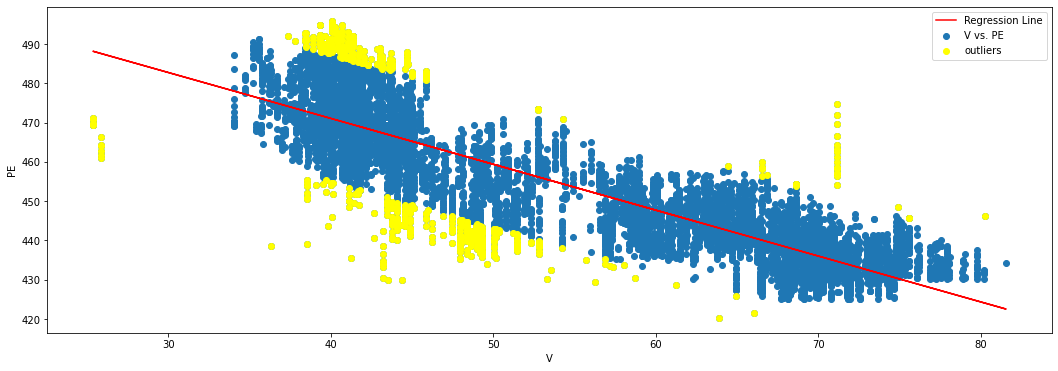

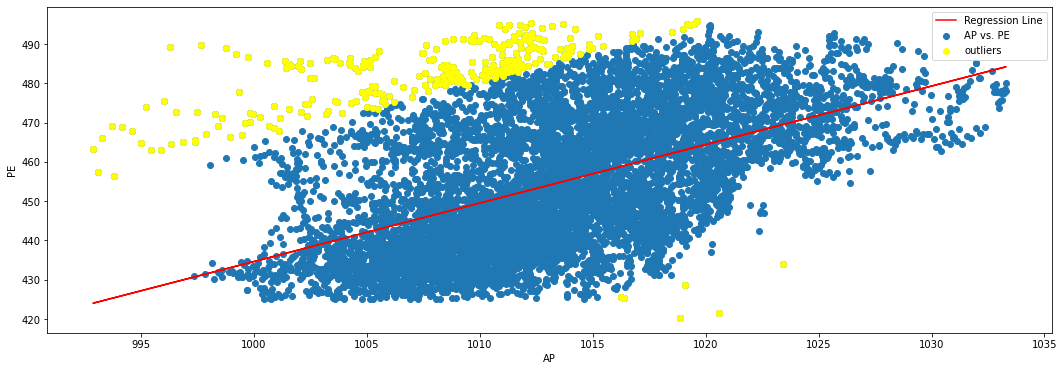

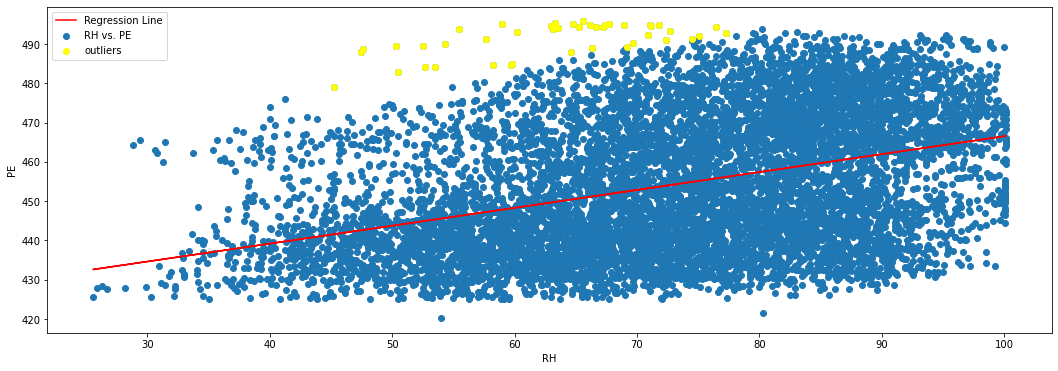

In [7]:
#using inter quartile range to find outliers
for i in independent_columns:
    x_val= df[[i]].values
    y_val= df[dependent_column].values
    # Linear Regression model
    model= LinearRegression()
    model.fit(x_val, y_val)
    y_predict= model.predict(x_val)
    res= y_val-y_predict
    
    q1= np.percentile(res,25)
    q3= np.percentile(res,75)
    iqr=q3-q1
    low= q1-1*iqr
    high= q3+1*iqr
    outliers= np.where((res<low)|(res>high))[0]
   
    #plotting graph with outliers highlighted in yellow
    plt.figure(figsize=(18, 6))
    plt.scatter(x_val, y_val, label=f'{i} vs. {dependent_column}')
    plt.plot(x_val, y_predict, color='red', label='Regression Line')
    plt.scatter(x_val[outliers], y_val[outliers], color='yellow', label='outliers')
    plt.xlabel(i)
    plt.ylabel(dependent_column)
    plt.legend()
    plt.show()
    outlier_indices=np.array([])
    
    

### (d) Multiple Regression

In [8]:
# multiple regression model using statsmodels
independent_columns= ['AT', 'V', 'AP','RH']
dependent_column='PE'

x_val= df[independent_columns]
x_val= sm.add_constant(x_val)  

model=sm.OLS(df[dependent_column],x_val).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:36:49   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

We can reject null hypothesis for all predictors as all the p values are 0.

### (e) 1c Compare to 1d

In [9]:
#creating a dataframe with coefficients of y we got after performing multiple regression in question 1(c)
coef= model.params[independent_columns]
coef_df= pd.DataFrame({'Variable':coef.index,'Y_Coefficient':coef.values})
print(coef_df)


  Variable  Y_Coefficient
0       AT      -1.977513
1        V      -0.233916
2       AP       0.062083
3       RH      -0.158054


In [10]:
#creating a dataframe with coefficients of x we got after performing question 1(d)
uni_x= pd.DataFrame(columns=['Variables', 'X_Coefficient'])
for i in independent_columns:
    x_value= df[i]
    y_val= df[dependent_column]
    
    model= sm.OLS(y_val,sm.add_constant(x_value)).fit()
    # Extracts the coefficients of x
    x_coef= model.params[i]
    uni_x= uni_x.append({'Variables':i, 'X_Coefficient': x_coef}, ignore_index=True)

res= pd.concat([uni_x,coef_df], axis=1)
res

,Variables,X_Coefficient,Variable,Y_Coefficient
0,AT,-2.171320,AT,-1.977513
1,V,-1.168135,V,-0.233916
2,AP,1.489872,AP,0.062083
3,RH,0.455650,RH,-0.158054


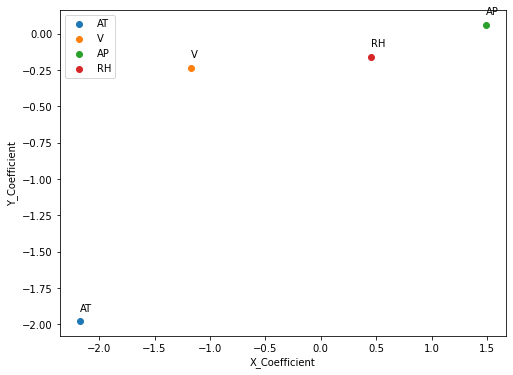

In [11]:
#plottind the result datafarme

fig, ax= plt.subplots(figsize=(8, 6))
for i, row in res.iterrows():
    variable= row['Variable']
    x_c= row['X_Coefficient']
    y_c= row['Y_Coefficient']
    
    ax.scatter(x_c,y_c,label=variable)
    ax.annotate(variable, (x_c, y_c), textcoords="offset points", xytext=(0,10))
    
ax.set_xlabel('X_Coefficient')
ax.set_ylabel('Y_Coefficient')
ax.legend()
plt.show()



### (f) Nonlinear Association

In [12]:
#finding evidence of non-linear association
DEGREE = 3
def association(indep_col, dep_col):
    indep_data = df[indep_col].to_numpy().reshape(-1, 1)
    p_f= PolynomialFeatures(degree= DEGREE)
    p_fit= p_f.fit_transform(indep_data)
    model= sm.OLS(df[dep_col].to_numpy(),p_fit).fit()
    
    print(f"Summary of Feature: {indep_col}")
    print(model.summary())
    print()

association("AT", "PE")
association("V", "PE")
association("AP", "PE")
association("RH", "PE")



Summary of Feature: AT
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:36:50   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.

A. From above result we can say that all p values for AT,AP,RH are 0. Hence, we reject null hypothesis for these predictors and their is non-linear association between these predictors and response.

B. For V, we can see that p values for x2 and x3 are high, so we can not reject null hypothesis for this predictor and their is no non-linear association between V and PE.

### (g) Interactions of Predictors

In [13]:
#interaction of all predictors with each other

independent_columns= ['AT', 'V', 'AP', 'RH']
int_term = []
i=0
j=1

while i < len(independent_columns):
    while j < len(independent_columns):
        term= f"{independent_columns[i]}*{independent_columns[j]}"
        int_term.append(term)
        j=j+1
    i=i+1
    j=i+1

formula= f"PE ~ {' + '.join(independent_columns)} + {' + '.join(int_term)}"
int_model= sm.OLS.from_formula(formula=formula, data=df).fit()
print(int_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:36:50   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

Condering p value<0.05 as base condition for the predictor to be statistically significant.
1. Predictors AT and AT:AP have p values higher that 0.05 but if we consider p=0.1 then only AT:AP is statistically not significant.
2. Other than AT:AP all other interaction terms are statistically significant.

### (h) Improvement

In [14]:
#spliting randomly selected dataset into training and testing dataset
training_dataset, testing_dataset = train_test_split(df, test_size=0.3, random_state=0)
compare={"model": [],"test error": [],"train error": []}

#dividing the predictors and response
x_train_predictor= training_dataset.iloc[:,:-1].values
y_train_response= training_dataset.iloc[:,-1].values
x_test_predictor= testing_dataset.iloc[:,:-1].values
y_test_response= testing_dataset.iloc[:,-1].values

In [15]:
predictor_df= pd.DataFrame(x_train_predictor, columns=['AT', 'V', 'AP', 'RH'])

model_initial= LinearRegression()
model_initial.fit(predictor_df, y_train_response)
x_sm= sm.add_constant(predictor_df)
#initial model
mod_sm= sm.OLS(y_train_response, x_sm).fit()
print("Summary for Initial Model:")
print(mod_sm.summary())


y_train_pred = mod_sm.predict(x_sm)
x_sm = sm.add_constant(x_test_predictor)  
y_test_pred = mod_sm.predict(x_sm)

train_mse =np.square(np.subtract(y_train_response,y_train_pred)).mean()
test_mse =np.square(np.subtract(y_test_response,y_test_pred)).mean()

compare["model"].append("Initial model")
compare["test error"].append(test_mse)
compare["train error"].append(train_mse)

# Print the MSEs
print("Train MSE for initial model:", train_mse)
print("Test MSE for initial model:", test_mse)


Summary for Initial Model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:36:50   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        448.5613    

In [16]:
poly= PolynomialFeatures(degree=2, include_bias=False)
X_train_poly= poly.fit_transform(df.drop('PE', axis=1))

poly_feature_names= poly.get_feature_names(df.drop('PE', axis=1).columns)
X_train_poly_df= pd.DataFrame(X_train_poly, columns=poly_feature_names)

X_train_poly_df= sm.add_constant(X_train_poly_df) 
X_train, X_test, y_train, y_test= train_test_split(X_train_poly_df, df['PE'], test_size=0.3, random_state=0)
model= sm.OLS(y_train, X_train).fit()

X_test_poly= poly.transform(testing_dataset.drop('PE', axis=1))
X_test_poly_df= pd.DataFrame(X_test_poly, columns=poly_feature_names)
X_test_poly_df= sm.add_constant(X_test_poly_df)
y_pred_poly= model.predict(X_test_poly_df)

y_pred= model.predict(X_test)
y_train_pred= model.predict(X_train)
test_mse= mean_squared_error(y_test, y_pred)
train_mse= mean_squared_error(y_train, y_train_pred)

# Print the MSEs
print("Train Mean Squared Error (MSE):", train_mse)
print("Test Mean Squared Error (MSE):", test_mse)
# Summary of the Regression Model
compare["model"].append("All terms with quad model")
compare["test error"].append(test_mse)
compare["train error"].append(train_mse)
print(model.summary())


Train Mean Squared Error (MSE): 18.366012211971057
Test Mean Squared Error (MSE): 17.52016099747655
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:36:50   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [17]:
#print(X_train.columns[1])
p_values= model.pvalues
X_train.drop('const', axis=1)
X_test.drop('const',axis = 1)
max_p_value= p_values[1:]  

for i in range(0,len(max_p_value.values)):
    if max_p_value.values[i] > 0.05:
       
        X_train.drop(X_train.columns[i], axis=1)

model1= sm.OLS(y_train, X_train).fit()

for i in range(0,len(max_p_value)):
    if max_p_value[i] > 0.05:
        # dropping the prdictor with highest p-value
        X_test.drop(X_test.columns[i], axis =1)

y_pred1 = model1.predict(X_test)
test_mse1 = mean_squared_error(y_test, y_pred1)
y_train_pred1 = model1.predict(X_train)
train_mse1 = mean_squared_error(y_train, y_train_pred1)


print("Train Mean Squared Error (MSE):", train_mse1)
print("Test Mean Squared Error (MSE):", test_mse1)
final_model=model1

compare["model"].append("Model after removing insignificant predictors")
compare["test error"].append(test_mse1)
compare["train error"].append(train_mse1)

print("Final Model Summary:")
print(final_model.summary())


Train Mean Squared Error (MSE): 18.366012211971057
Test Mean Squared Error (MSE): 17.52016099747655
Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:36:50   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

### (i) KNN

Best k value = 5
Least test error for KNN regression with raw features = 15.6635051689307
Least train error for KNN regression with raw features = 10.826427918172316


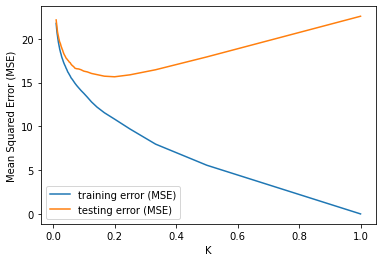

In [18]:
#raw features
train_error_l= []
testing_error_l= []
plot_k= []
most_suitable_k_val=0
least_error_knn_raw= float("inf")

for k in range(1,101,1):
    knn_algo= KNeighborsRegressor(n_neighbors=k)
    knn_algo.fit(x_train_predictor, y_train_response)
    
    y_train_pred= knn_algo.predict(x_train_predictor)
    y_test_pred= knn_algo.predict(x_test_predictor)
    
    training_error= mean_squared_error(y_train_response, y_train_pred)
    train_error_l.append(training_error)
    testing_error= mean_squared_error(y_test_response, y_test_pred)
    testing_error_l.append(testing_error)
    
    plot_k.append(1/k)
    if testing_error < least_error_knn_raw:
        least_error_knn_raw=testing_error
        most_suitable_k_val= k
        least_training_error_raw=training_error
        
compare["model"].append("KNN with raw Features")
compare["test error"].append(least_error_knn_raw)
compare["train error"].append(least_training_error_raw)

print("Best k value =", most_suitable_k_val)
print("Least test error for KNN regression with raw features =", least_error_knn_raw)
print("Least train error for KNN regression with raw features =", least_training_error_raw)

plt.plot(plot_k, train_error_l, label="training error (MSE)")
plt.plot(plot_k, testing_error_l, label="testing error (MSE)")
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Mean Squared Error (MSE)")
plt.gca().legend()
plt.show()


Best k value = 6
Least test error for KNN with normalized features = 14.419305639730645
Least train error for KNN with normalized features = 10.683609982496314


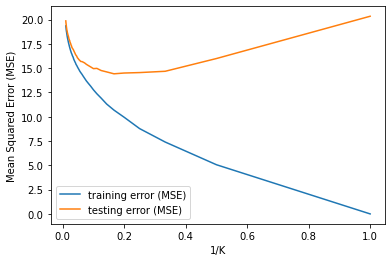

In [19]:
train_error_l= []
testing_error_l= []
plot_k= []
most_suitable_k_val= 0
least_error_knn_norm= float("inf")

# normalizing the datasets
scaler = StandardScaler()
x_train_norm= scaler.fit_transform(x_train_predictor)
x_test_norm= scaler.transform(x_test_predictor)

for k in range(1, 101,1):
    knn_algo= KNeighborsRegressor(n_neighbors=k)
    knn_algo.fit(x_train_norm, y_train_response)
    y_train_pred= knn_algo.predict(x_train_norm)
    y_test_pred= knn_algo.predict(x_test_norm)
    
    training_error= mean_squared_error(y_train_response, y_train_pred)
    train_error_l.append(training_error)
    testing_error= mean_squared_error(y_test_response, y_test_pred)
    testing_error_l.append(testing_error)
    plot_k.append(1/k)
    
    if testing_error < least_error_knn_norm:
        least_error_knn_norm= testing_error
        most_suitable_k_val= k
        least_training_error_norm=training_error
        
compare["model"].append("KNN with normalized Features")
compare["test error"].append(least_error_knn_norm)
compare["train error"].append(least_training_error_norm)

print("Best k value =",most_suitable_k_val)
print("Least test error for KNN with normalized features =",least_error_knn_norm)
print("Least train error for KNN with normalized features =",least_training_error_norm)

plt.plot(plot_k, train_error_l, label="training error (MSE)")
plt.plot(plot_k, testing_error_l, label="testing error (MSE)")
plt.gca().set_xlabel("1/K")
plt.gca().set_ylabel("Mean Squared Error (MSE)")
plt.gca().legend()
plt.show()


### (j ) Compare KNN and Linear

In [20]:
#comparing all models together
data_compare= pd.DataFrame(compare)
data_compare

,model,test error,train error
0,Initial model,20.368383,20.941564
1,All terms with quad model,17.520161,18.366012
2,Model after removing insignificant predictors,17.520161,18.366012
3,KNN with raw Features,15.663505,10.826428
4,KNN with normalized Features,14.419306,10.683610


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

Performance of flexible statistical model is better in this scenario as number of predictors is small and large sample size means there is a huge amount of data to be analysed, thus, increasing the risk of underfitting

### (b) The number of predictors p is extremely large, and the number of observations n is small.

Performance of inflexible statistical model will be better in this scenario as number of predictors is very large and number of observation is small, thus, increasing risk of overfitting. 

### (c) The relationship between the predictors and response is highly non-linear.

Performance of flexible statistical odel will be better in this scenario as flexible model gives higher predictive accuracy, also flexible model is much more capable of handling complex relationships compared to inflexible one.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

Performance of inflexible statistical model will be better in this scenario as high variance means higher error or noise in data, in this scenario flexible model will do overfitting and will become overly complex.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [21]:
obs=[[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]]
t_point=[0,0,0]

distance=[]
for i in range(len(obs)):
    x1,y1,z1=obs[i]
    x2,y2,z2=t_point
    dist=((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)**0.5
    distance.append(dist)
    
df = pd.DataFrame({'Observation': range(1, len(obs) + 1), 'Distance': distance})

df

,Observation,Distance
0,1,3.000000
1,2,2.000000
2,3,3.162278
3,4,2.236068
4,5,1.414214
5,6,1.732051


### (b) What is our prediction with K = 1? Why?

Our prediction with k=1 is closest to Observation 5, hence the prediction is Green.

### (c) What is our prediction with K = 3? Why?

Observation 5, observation 6 and observation 2 are 3 nearest neighbors. Betwen three neighbours, 2 of the y are red and one is green, hence, for k=3 we predict y is Red.

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If the Bayes decision boundary in this problem is highly non-linear, then the best value for k will be small. As K value increases, the decision boundary is not as sharp as needed, it is more linear.